In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Importing Dataset


In [3]:
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True,)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 145kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.38MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.43MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
X ,y = next(iter(dataloader))

tensor(5)

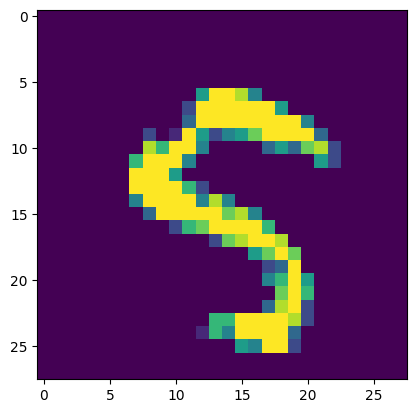

In [6]:
plt.imshow(X[1].permute(1,2,0)) 
y[1]

In [7]:
# Device Agnositc code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Model

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(100, 256, 7, 1, 0, bias=False),  # (256, 7, 7)
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # (128, 14, 14)
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 1, 4, 2, 1, bias=False),    # (1, 28, 28)
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),     #  (64, 14, 14)
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),   #  (128, 7, 7)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 3, 2, 0, bias=False),  #  (256, 3, 3)
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(256 * 3 * 3, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [10]:
torch.cuda.manual_seed(1)
torch.manual_seed(1)
G = Generator().to(device)
D = Discriminator().to(device)

In [11]:
batch_size = 128
image_size = 28

# Setting Optimizer and Loss

In [12]:
loss_fn = nn.BCELoss()
optimizer_G = torch.optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Train Test Loop

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 1] D_loss: 1.8736, G_loss: 2.4725
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


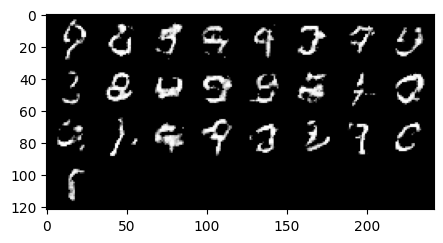

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 2] D_loss: 0.8936, G_loss: 2.5906
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


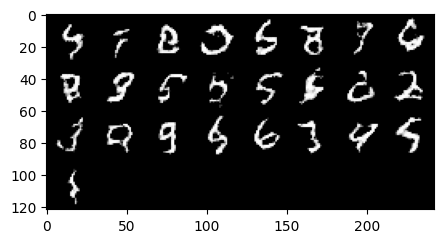

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 3] D_loss: 0.2637, G_loss: 1.9798
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


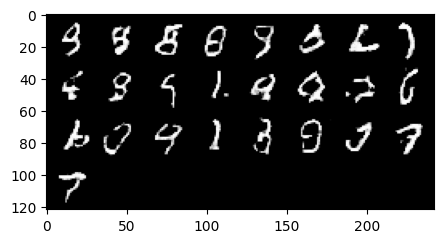

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 4] D_loss: 1.5431, G_loss: 0.3367
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


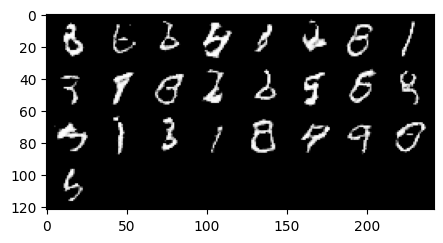

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 5] D_loss: 0.2467, G_loss: 2.5599
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


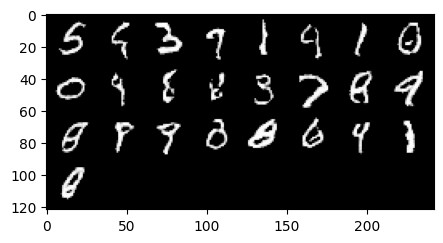

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 6] D_loss: 0.2304, G_loss: 2.6577
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


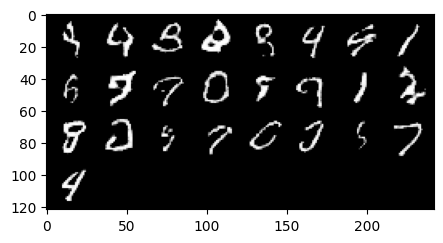

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 7] D_loss: 0.2619, G_loss: 2.4419
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


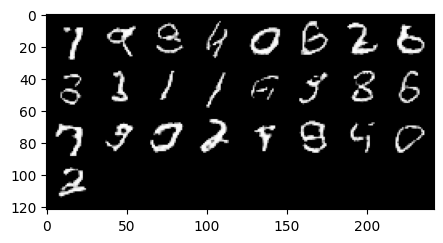

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 8] D_loss: 0.2227, G_loss: 2.6372
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


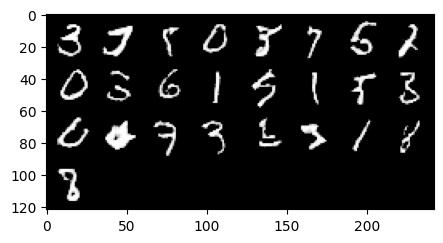

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 9] D_loss: 0.4931, G_loss: 2.6146
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


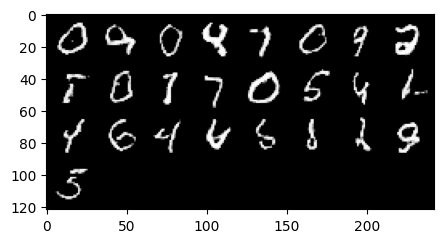

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 10] D_loss: 0.1884, G_loss: 3.4706
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


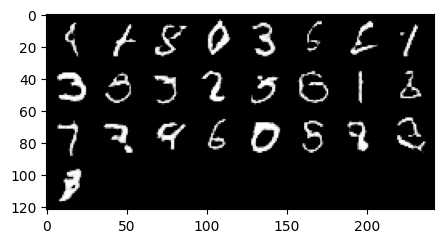

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 11] D_loss: 0.3174, G_loss: 6.7855
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


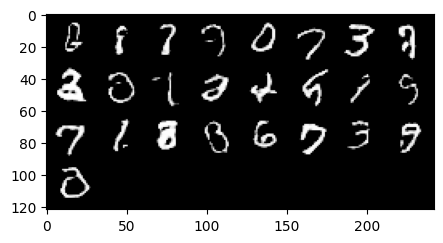

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 12] D_loss: 0.2439, G_loss: 4.4642
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


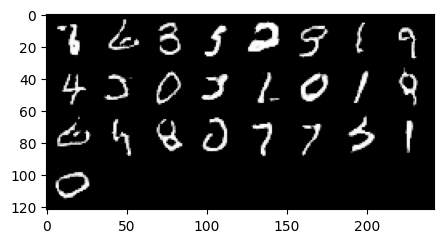

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 13] D_loss: 0.2794, G_loss: 3.1308
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


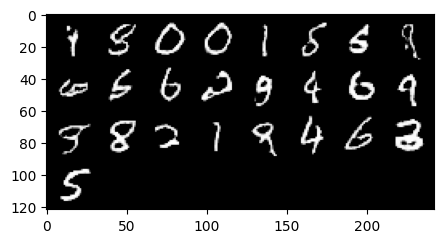

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 14] D_loss: 0.0688, G_loss: 3.5172
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


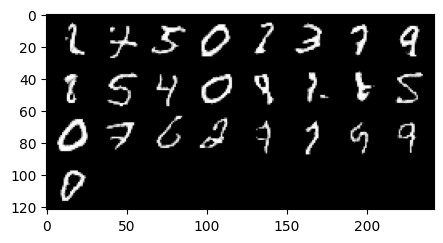

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 15] D_loss: 0.1371, G_loss: 3.5321
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


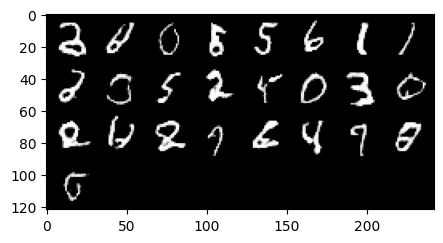

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 16] D_loss: 0.2322, G_loss: 5.1318
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


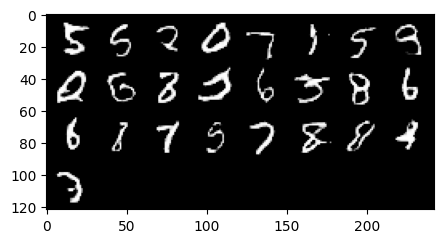

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 17] D_loss: 0.4862, G_loss: 2.1465
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


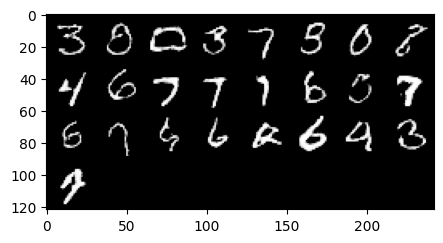

  0%|          | 0/469 [00:00<?, ?it/s]

[Epoch 18] D_loss: 0.2587, G_loss: 2.1332
torch.Size([25, 1, 28, 28])
torch.Size([25, 1, 28, 28])


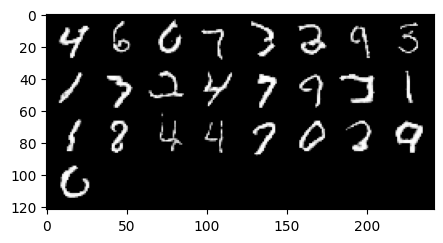

In [ ]:
epochs = 20 

for epoch in range(epochs):
    G.train()
    D.train()

    for real_imgs, _ in tqdm(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.shape[0]
        
        z = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_imgs = G(z)


        
        ones = torch.ones(batch_size, 1, device=device)
        zeros = torch.zeros(batch_size, 1, device=device)
        
        D_real = D(real_imgs)
        D_fake = D(fake_imgs.detach())

        d_loss_real = loss_fn(D_real, ones)
        d_loss_fake = loss_fn(D_fake, zeros)
        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()


        
        z = torch.randn(batch_size, 100 , 1, 1, device=device)
        fake_imgs = G(z)
        D_fake = D(fake_imgs)
        g_loss = loss_fn(D_fake, ones)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"[Epoch {epoch+1}] D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

    # Show sample generated images
    with torch.inference_mode():
        Z = torch.randn(25,100,1,1).to(device)
        
        G_pred= G(Z).detach()

        # print(G_pred.shape)

        
        # print(G_pred.shape)
        imgs = torchvision.utils.make_grid(G_pred)
        
        plt.figure(figsize=(5,5))
        npimgs = imgs.cpu().numpy()
        plt.imshow(np.transpose(npimgs , (1,2,0)))
        plt.show()
